In [1]:
import os
import pandas as pd
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cwd = os.getcwd()
path = cwd + "\output"
if not os.path.exists(path):
    os.mkdir(path)

df = pd.read_csv('taxa4FDR.txt', delimiter = "\t")
y = list(df.iloc[:, 0])
df.drop([df.columns[0]], axis=1, inplace=True)
df = df.transpose()
df = df.loc[(df!=0).any(axis=1)]
groupsize = (len(y)/2)

In [3]:
# First calcuate p-value from Mann-Whitney U rank test on two independent samples
dfMWUdata = pd.DataFrame()
indexlist = []
MWUstatlist = []
MWUpvallist = []

for index, row in df.iterrows():
    row = pd.Series(row)
    controls = []
    cases = []
    for i in range(int(groupsize)):
        cases.append(row[i])
        controls.append(row[i+groupsize])
    MWUstat, MWUpval = mannwhitneyu(cases, controls, method="exact")
    indexlist.append(index)
    MWUstatlist.append(MWUstat)
    MWUpvallist.append(MWUpval)
    print(index, 'with a p-value of', MWUpval)

dfMWUdata['Index'] = indexlist
dfMWUdata['MWUstat'] = MWUstatlist
dfMWUdata['MWUpval'] = MWUpvallist

TypeError: mannwhitneyu() got an unexpected keyword argument 'method'

In [4]:
# Adjust p-values - for method options see https://www.statsmodels.org/dev/generated/statsmodels.stats.multitest.multipletests.html
reject, correctedpvals, _, correctedalpha = multipletests(MWUpvallist, alpha=0.05, method='bonferroni', is_sorted=False, returnsorted=False)
print()
#print(np.sum(reject))
print('The corrected alpha is ' + str(correctedalpha))
dfMWUdata['Correctedpvals'] = correctedpvals
dfMWUdata.to_csv('output\dfMWUdata.txt', sep='\t', index=False)


The corrected alpha is 9.891196834817013e-06


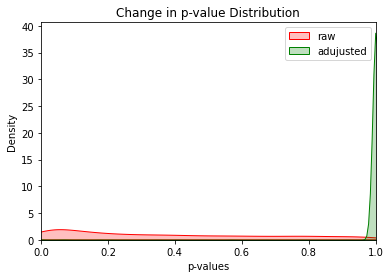

In [5]:
sns.kdeplot(MWUpvallist, color="red", shade=True, label='raw')
ax = sns.kdeplot(correctedpvals, color="green", shade=True, label='adujusted')
ax.set(xlim=(0, 1))
plt.title('Change in p-value Distribution')
plt.xlabel('p-values')
plt.ylabel('Density')
plt.legend(loc = 'best')
plt.show()